## Easily deploy machine learning models from the comfort of your Notebook

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
import modelbit
mb = modelbit.login()

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/moezali1/modelbit/main/loans.csv')

In [5]:
data.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


### EDA

In [6]:
data.isnull().sum()

Applicant_ID             0
Age                      0
Annual_Income            0
Credit_Score             0
Employment_Years         0
Loan_Amount_Requested    0
Default                  0
dtype: int64

<Axes: >

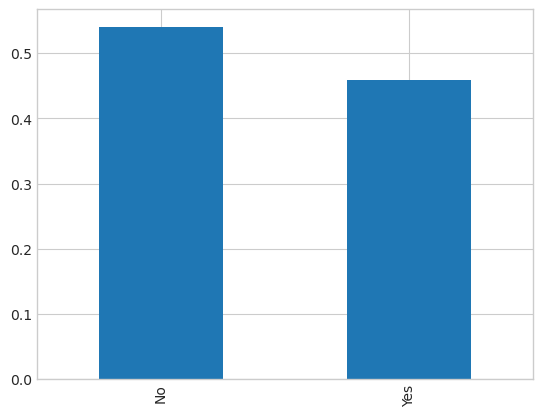

In [7]:
data.Default.value_counts(normalize=True).plot.bar()

<Axes: >

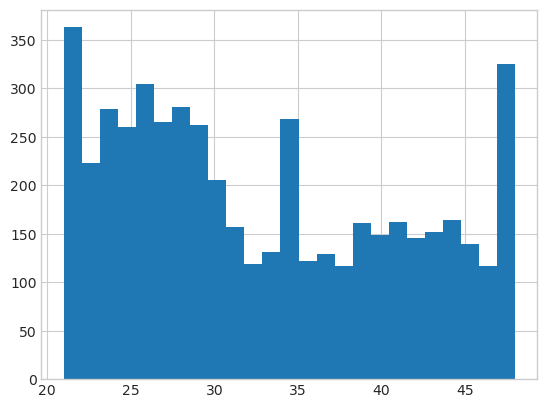

In [8]:
data.Age.hist(bins=25)

<Axes: >

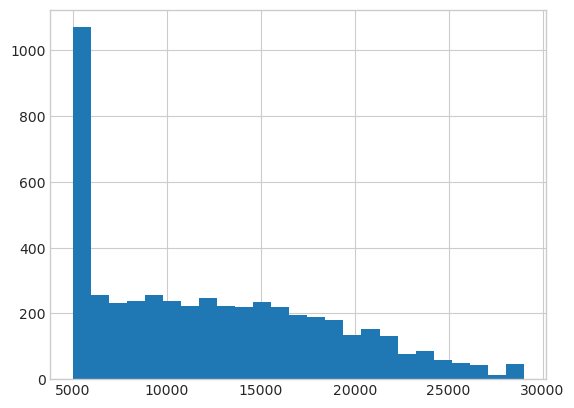

In [9]:
data['Loan_Amount_Requested'].hist(bins=25)

### Pipeline training and selection

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

In [11]:
# Features and target variable
X = data.drop(columns=['Default', 'Applicant_ID'])
y = data['Default']

# Columns to be scaled
numeric_features = ['Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']

# Column to be binned and one-hot encoded
categorical_features = ['Age']

In [12]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('bin', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

In [13]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [14]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3500, 5)
X_test: (1500, 5)
y_train: (3500,)
y_test: (1500,)


In [15]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [16]:
y_pred = pipeline.predict(X_test)
y_pred

array(['No', 'Yes', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [17]:
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
y_pred_prob

array([6.69689426e-05, 9.02806812e-01, 9.96185218e-01, ...,
       2.41424602e-02, 8.03381646e-01, 9.78944885e-01])

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, y_pred)

0.9606666666666667

In [20]:
import pandas as pd
import numpy as np

# first define function
def predict_loan_default(Age: int, Annual_Income: float, Credit_Score: int, Employment_Years: float, Loan_Amount_Requested: float)-> float:

  """
  Predict the probability of loan default using a pre-trained machine learning pipeline.

  Args:
      Age (int): Applicant's age.
      Annual_Income (float): Applicant's annual income.
      Credit_Score (int): Applicant's credit score.
      Employment_Years (float): Number of years employed.
      Loan_Amount_Requested (float): Requested loan amount.

  Returns:
      float: Probability of loan default.
  """

  return pipeline.predict_proba(pd.DataFrame([[Age, Annual_Income, Credit_Score, Employment_Years, Loan_Amount_Requested]],
                                             columns = ['Age', 'Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']))[:,1]

In [21]:
data.head(5)

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [22]:
predict_loan_default(32, 821233, 689, 1, 10789)

array([4.28870351e-27])

In [23]:
mb.deploy(predict_loan_default)

Uploading 'pipeline': 100%|██████████| 1.86k/1.86k [00:00<00:00, 1.89kB/s]


In [25]:
!curl -s -XPOST "https://kmyuyu.app.modelbit.com/v1/predict_loan_default/latest" \
    -d '{"data": [32, 821233, 689, 1, 10789]}' | json_pp

{
   "data" : [
      4.28870351436057e-27
   ]
}


In [26]:
!curl -s -XPOST "https://kmyuyu.app.modelbit.com/v1/predict_loan_default/latest" \
    -d '{"data": [30, 53172, 588, 3, 5442]}' | json_pp

{
   "data" : [
      0.996950514967483
   ]
}


In [27]:
import requests
import json

url = "https://kmyuyu.app.modelbit.com/v1/predict_loan_default/latest"
headers = {
    'Content-Type': 'application/json'
}
data = {
    "data": [30, 53172, 588, 3, 5442]
}

response = requests.post(url, headers=headers, json=data)
response_json = response.json()

print(json.dumps(response_json, indent=4))

{
    "data": [
        0.9969505149674829
    ]
}
